<a href="https://colab.research.google.com/github/IrinejIT52/PPPO_Projekat/blob/main/PPPOProjekat_IrinejKuzmanIT52_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predmet**: Principi prezentacije i prepoznavanja oblika </br>
**Student**: Irinej Kuzman </br>
**Broj indeksa**: IT52/2020 </br>
**Projektni zadatak**: Mammlas Classification </br>



---

# UVOD

**Mašinsko učenje** je grana veštačke inteligencije koja se bavi razvojem algoritama i tehnika koje omogućavaju računarima da automatski uče iz podataka, bez eksplicitnog programiranja. Ovi algoritmi koriste statističke modele i matematičke metode kako bi identifikovali obrasce i zakonitosti u podacima, kako bi mogli da donose predikcije, donose odluke ili obavljaju zadatke bez ljudske intervencije. Mašinsko učenje se koristi u različitim oblastima, kao što su prepoznavanje slika, obrada prirodnog jezika, preporučivanje proizvoda, autonomna vožnja i mnoge druge. </br>

Postoji 5 tipova mašinskog učenja, a to su:
1. Nadgledano učenje: Ovde se koriste označeni podaci, gde se model trenira na ulaznim podacima i odgovarajućim izlaznim vrednostima. Cilj je da model nauči mapiranje između ulaza i izlaza kako bi mogao da donosi predikcije na novim, neviđenim podacima.

2. Nesnadgledano učenje: Ovde se koriste neoznačeni podaci, gde model treba da pronađe obrasce i strukture u podacima bez prethodno poznatih izlaza. Ova tehnika se često koristi za grupisanje podataka, smanjenje dimenzionalnosti ili generisanje novih reprezentacija podataka.

3. Pojačano učenje: Ova tehnika se koristi za obuku modela da donosi odluke na osnovu interakcije sa okruženjem. Model se nagrađuje ili kažnjava na osnovu svojih akcija, kako bi naučio optimalno ponašanje u datom okruženju.

4. Polu-nadgledano učenje: Ova tehnika kombinuje elemente nadgledanog i nesnadgledanog učenja. Koristi se kada imamo ograničen broj označenih podataka, ali i veliku količinu neoznačenih podataka. Cilj je da se iskoristi neoznačeni podaci kako bi se poboljšala tačnost modela.

5. Prenosno učenje: Ova tehnika se koristi kada želimo da prenesemo znanje sa jednog problema na drugi sličan problem. Model se trenira na jednom zadatku, a zatim se to znanje koristi za rešavanje drugog zadatka.

**Klasifikacija** je jedan od osnovnih zadataka u mašinskom učenju. Ona se odnosi na proces dodeljivanja kategorija ili labela novim, neviđenim podacima na osnovu prethodno naučenog modela. Cilj klasifikacije je da se pronađe veza između ulaznih podataka i odgovarajuće kategorije ili klase. U klasifikaciji, model se trenira na skupu podataka koji sadrže ulazne podatke i odgovarajuće kategorije. Na osnovu tih podataka, model gradi funkciju koja može da predvidi kategoriju za nove, neviđene podatke. Kada se primeni na novi ulaz, model donosi odluku o tome kojoj kategoriji taj ulaz pripada.

# BIBLIOTEKE


**1. TensorFlow** je popularna open-source biblioteka za mašinsko učenje koja je napisana u Pythonu. Ona pruža alate i resurse za izgradnju i treniranje različitih modela mašinskog učenja, kao što su neuronske mreže. TensorFlow je razvijen od strane Google Brain tima i koristi se širom sveta u industriji i akademskim krugovima.Biblioteka TensorFlow omogućava efikasno izvršavanje numeričkih operacija na velikim skupovima podataka, kao i automatsko diferenciranje za optimizaciju modela. Takođe pruža fleksibilnost u izgradnji i treniranju različitih arhitektura neuronskih mreža, kao što su konvolutivne neuronske mreže (CNN), rekurentne neuronske mreže (RNN) i generativne suparničke mreže (GAN). TensorFlow takođe ima bogatu ekosistem podrške, uključujući alate za vizualizaciju, optimizaciju, raspodelu i razmenu modela. Takođe podržava rad na različitim platformama, uključujući desktop računare, servere i mobilne uređaje.

**2. NumPy** je osnovni paket za naučno računarstvo u Python-u. To je Python biblioteka koja obezbjeđuje višedimenzionalni niz objekata, različite izvedene objekte (kao što su maskirani nizovi i matrice) i niz rutina za brze operacije na nizovima, uključujući matematičku, logičku, manipulaciju oblika, sortiranje, selekciju, I/O, diskretne Furijeove transformacije, osnovna linearna algebra, osnovne statističke operacije, simulacije nasumičnih brojeva i mnogo više.

**3. Matplotlib** je višeplatformska biblioteka za vizualizaciju podataka i grafičko crtanje (histogrami, raspoređeni grafikoni, stubičasti dijagrami, itd.) za Python i njegovo numeričko proširenje NumPy. Kao takva, ona predstavlja open-source alternativu za MATLAB. Programeri takođe mogu koristiti matplotlib-ove API-je (aplikacioni programerski interfejs) kako bi ugradili dijagrame u GUI aplikacije.

**4. Torch** je popularna biblioteka za mašinsko učenje i duboko učenje u programskom jeziku Python. Ona pruža širok spektar alata i funkcionalnosti za izgradnju, treniranje i evaluaciju neuronskih mreža. Torch je baziran na Lua programskom jeziku, ali postoji i Python verzija poznata kao PyTorch. PyTorch je open-source biblioteka koja omogućava efikasno korišćenje GPU-ova za ubrzanje izračunavanja. Ona pruža fleksibilnost i jednostavnost u korišćenju, što je čini popularnim izborom za istraživače i praktičare u oblasti mašinskog učenja. PyTorch podržava automatsko diferenciranje, što olakšava optimizaciju modela, kao i bogatu kolekciju algoritama za optimizaciju, funkcija gubitka i slojeva za izgradnju neuronskih mreža.






In [ ]:
import torch
from torchvision import models, transforms
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# PRIPREMA PODATAKA

Pre obučavanja našeg modela dubokog učenja, neophodno je prethodno obraditi podatke. Ovaj proces uključuje nekoliko ključnih koraka:

**1. Normalizacija:** Mi menjamo vrednosti piksela na slikama iz opsega od 0-255 do 0-1. Ova normalizacija pomaže u ubrzavanju procesa treninga i smanjenju šanse za preopterećenje.

**2. Promena veličine slike:** Mi menjamo veličinu svih slika na ujednačenu veličinu od 256x256 piksela. Ova uniformnost je neophodna jer ulazni sloj naše neuronske mreže očekuje slike iste veličine.

**3. Podela podataka:** Skup podataka je podeljen na podskupove za obuku i validaciju. Koristimo 80% podataka za obuku i 20% za validaciju. Ovo razdvajanje pomaže u proceni performansi modela na nevidljivim podacima.

**4. Kategoričke oznake:** Pošto je ovo problem klasifikacije sa više klasa, postavili smo class_mode na 'kategorički', što znači da će naše oznake biti jednokratno kodirane.

In [ ]:
def preprocess_data(data_dir, img_size=(256, 256), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

    return train_generator, validation_generator

# MODEL

Izgradnja efikasnog modela dubokog učenja uključuje definisanje njegove arhitekture i kompajliranje sa odgovarajućim postavkama:

**Arhitektura modela:** Koristimo osnovni model (koji može biti prethodno obučeni model kao što je VGG19 ili ResNet101) praćen globalnim prosječnim objedinjavanjem i gustim slojevima. Globalni prosečan sloj objedinjavanja pojednostavljuje izlaz osnovnog modela, a gusti slojevi se koriste za klasifikaciju.

**Izlazni sloj:** Poslednji gusti sloj ima funkciju softmak aktivacije sa brojem jedinica jednakim broju klasa (45 u ovom slučaju). Softmak se koristi jer je problem klasifikacije više klasa.

**Kompilacija:** Mi sastavljamo model koristeći Adam optimizator sa stopom učenja od 0,0001. Funkcija gubitka koja se koristi je 'categorical_crossentropi', koja je standardna za zadatke klasifikacije u više klasa. Takođe pratimo metriku tačnosti da bismo procjenili naš model.

In [ ]:
def build_model(base_model, num_classes):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# UČITAVANJE SETA PODATAKA

Data set se sastoji od 45 folder, koji predstavljaju različite vrste sisara.

Prvo je potrebno povezati Google Colab sa drajvom na kome se nalazi dataset podataka, a potom izvršiti učitavanje podataka.

Podatke dijelimo na trening podatke i na podatke za testiranje, odnosno validaciju modela.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/mammals'
num_classes = 45
train_gen, val_gen = preprocess_data(data_dir, img_size=(256, 256), batch_size=32)

Found 11020 images belonging to 45 classes.
Found 2731 images belonging to 45 classes.


# PRIKAZ UCITANIH PODATAKA

Kako bih provjerio učitane podatke koristiću plot_images.
Prikazano je prvih 10 fotografija koje se nalaze u trening dataset-u.

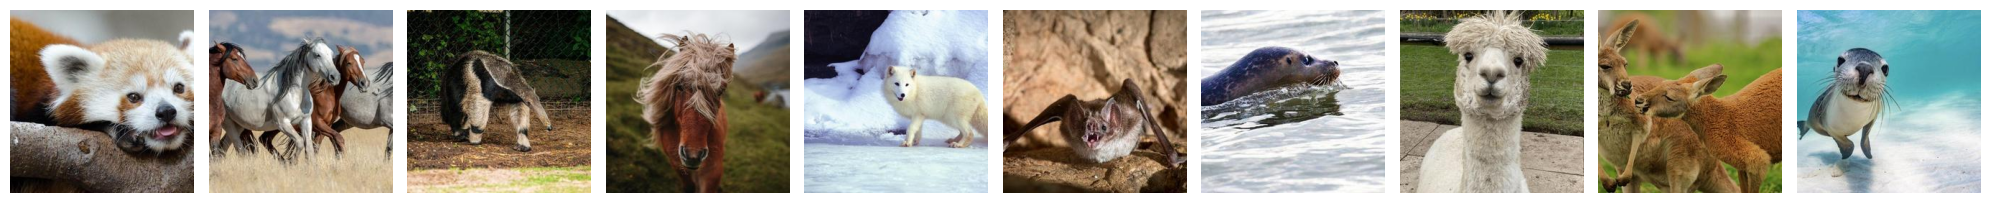

In [ ]:
def plot_images(images_arr, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_gen)
plot_images(sample_training_images[:10], class_names=train_gen.class_indices)

# PROVJERA DISTRIBUCIJE KLASA

Razumevanje distribucije klasa u našem skupu podataka je ključno. Neravnomjerna distribucija može dovesti do pristrasnosti u našem modelu, gde ima dobre rezultate na nekim klasama, ali loše na drugima.

**Izračunavanje broja klasa:** Izračunavamo broj slika za svaku klasu u našem skupu podataka za trening. Ovo nam daje predstavu o tome koliko je naš skup podataka uravnotežen ili neuravnotežen.

**Bar plot za distribuciju:** Pravimo trakasti grafikon da vizuelno predstavimo broj slika u svakoj klasi. Ovaj dijagram pomaže u brzoj identifikaciji da li je neka klasa nedovoljno ili previše zastupljena u skupu podataka.

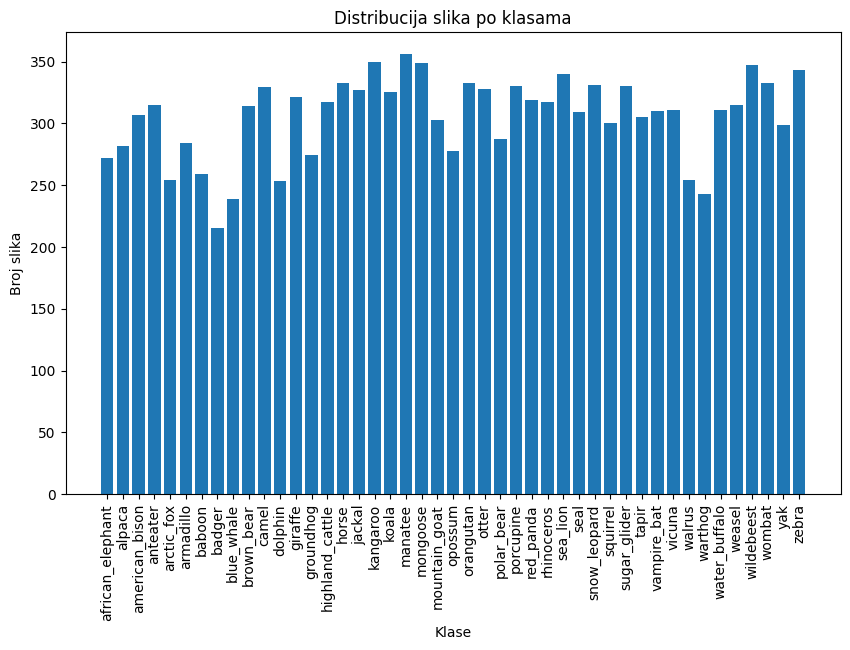

In [ ]:
import os

numberofPictures = list()
count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/mammals'):
    count = len(files)
    numberofPictures.append(count)

numberofPictures.pop(0)
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(10, 6))
plt.bar(class_names, numberofPictures)
plt.xlabel('Klase')
plt.ylabel('Broj slika')
plt.xticks(rotation=90)
plt.title('Distribucija slika po klasama')
plt.show()



# PRAVLJENJE I TRENING MODELA VGG19 I ResNet101

**VGG19 Model**

**Arhitektura modela:** Koristimo VGG19 kao osnovni model. Ovaj model je unapred obučen za skup podataka ImageNet, što mu daje dobru polaznu tačku za ekstrakciju karakteristika.

**Modifikacije**: Postavili smo include_top=False da prilagodimo izlazni sloj za naš specifičan broj klasa. Prethodno obučeni slojevi modela su postavljeni kao neobučeni, trainable  = False, da bi naučene karakteristike sa ImageNet-a ostale netaknute.

**ResNet101 Model**

Kreiramo ResNet101 model sa istim modifikacijama kao VGG19. ResNet101 je još jedna moćna arhitektura poznata po svojim dubokim slojevima i preostalim vezama, što ga čini efikasnim za širok spektar zadataka klasifikacije slika.

Koristimo **povratne pozive** da bismo sačuvali najbolju verziju svakog modela na osnovu tačnosti validacije. Ovaj pristup osigurava da zadržimo model na vrhuncu performansi tokom treninga.

In [ ]:
# VGG19
base_model_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_vgg.trainable = False
model_vgg = build_model(base_model_vgg, num_classes)

# ResNet101
base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_resnet.trainable = False
model_resnet = build_model(base_model_resnet, num_classes)

# Povratni pozivi
checkpoint_vgg = ModelCheckpoint('vgg_best_model.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_resnet = ModelCheckpoint('resnet_best_model.h5', monitor='val_accuracy', save_best_only=True)

# Trening modela
history_vgg = model_vgg.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint_vgg])
history_resnet = model_resnet.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint_resnet])

80134624/80134624 [==============================] - 4s 0us/step


171446536/171446536 [==============================] - 8s 0us/step


Epoch 1/8
345/345 [==============================] - 9528s 28s/step - loss: 2.8641 - accuracy: 0.2786 - val_loss: 2.1670 - val_accuracy: 0.4357


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/8
345/345 [==============================] - 93s 269ms/step - loss: 1.8866 - accuracy: 0.4967 - val_loss: 1.7289 - val_accuracy: 0.5397
Epoch 3/8
345/345 [==============================] - 94s 273ms/step - loss: 1.5323 - accuracy: 0.5859 - val_loss: 1.5528 - val_accuracy: 0.5855
Epoch 4/8
345/345 [==============================] - 96s 278ms/step - loss: 1.3497 - accuracy: 0.6238 - val_loss: 1.4052 - val_accuracy: 0.6060
Epoch 5/8
345/345 [==============================] - 94s 272ms/step - loss: 1.2237 - accuracy: 0.6576 - val_loss: 1.2874 - val_accuracy: 0.6423
Epoch 6/8
345/345 [==============================] - 94s 271ms/step - loss: 1.1332 - accuracy: 0.6839 - val_loss: 1.3219 - val_accuracy: 0.6291
Epoch 7/8
345/345 [==============================] - 94s 272ms/step - loss: 1.0460 - accuracy: 0.7081 - val_loss: 1.2519 - val_accuracy: 0.6488
Epoch 8/8
345/345 [==============================] - 96s 278ms/step - loss: 0.9898 - accuracy: 0.7192 - val_loss: 1.2267 - val_accuracy:

# PRIKAZ PRECIZNOSTI MODELA

Da bismo procjenili i uporedili performanse naših VGG19 i ResNet101 modela, važno je da prikažemo njihovu istoriju treninga. Ovaj prikaz nam pomaže da razumemo koliko dobro modeli uče tokom svoga treniga i da li postoje problemi kao što su preterano ili nedovoljno ugradnje. Koristićemo plot_history da prikažemo preciznost modela.

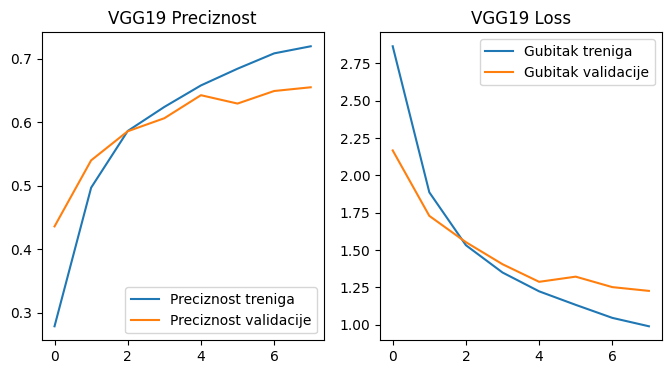

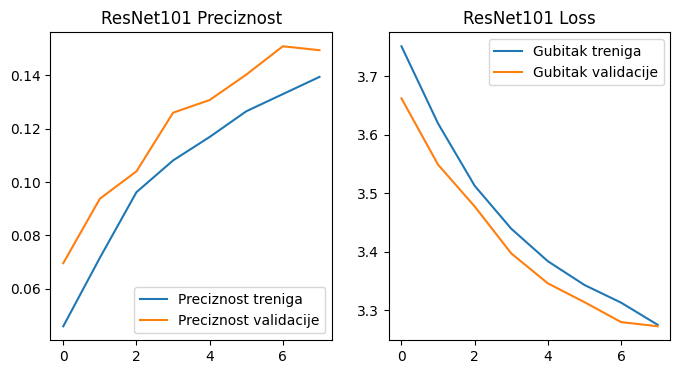

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Preciznost treniga')
    plt.plot(history.history['val_accuracy'], label='Preciznost validacije')
    plt.title(title + ' Preciznost')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Gubitak treniga')
    plt.plot(history.history['val_loss'], label='Gubitak validacije')
    plt.title(title + ' Loss')
    plt.legend()

    plt.show()


plot_history(history_vgg, 'VGG19')
plot_history(history_resnet, 'ResNet101')

Na kraju se prikazuju rezultati evaluacije modela. Gubitak mjeri koliko su tačne predikcije modela u odnosu na stvarne vrijednosti, dok tačnost predstavlja procenat tačno klasifikovanih uzoraka. Ovi rezultati pomažu u procjeni performansi modela na validacionom skupu i daju uvid u to koliko dobro se model generalizuje na stvarnim podacima.

# ZAKLJUČAK

U okviru projektnog zadatka izvršeno je učitavanje i analiza podataka, kao i podjela podataka na podatke za trening i test. Pored toga, izvršeno je kreiranje modela VGG19 i ResNet101, kao i treniranje navedenih modela i evaluacija modela. Pri istraživanju modela za klasifikaciju datih podataka VGG19 se istakao po preciznosti i sposobnosti da klasifikuje slike u svoje klase. Pri povećanju epoch-a dobila bi se veća preciznost, ali po ovome se može zaljučiti da je VGG19 definitivno bolji of RestNet101, odnosno da daje bolje rezultate.